<div style="font-family: monospace; white-space: pre; font-size: 10px;">
-> MMMMMMMM               MMMMMMMMEEEEEEEEEEEEEEEEEEEEEEDDDDDDDDDDDDD      RRRRRRRRRRRRRRRRR   IIIIIIIIII  
-> M:::::::M             M:::::::ME::::::::::::::::::::ED::::::::::::DDD   R::::::::::::::::R  I::::::::I  
-> M::::::::M           M::::::::ME::::::::::::::::::::ED:::::::::::::::DD R::::::RRRRRR:::::R I::::::::I  
-> M:::::::::M         M:::::::::MEE::::::EEEEEEEEE::::EDDD:::::DDDDD:::::DRR:::::R     R:::::RII::::::II  
-> M::::::::::M       M::::::::::M  E:::::E       EEEEEE  D:::::D    D:::::D R::::R     R:::::R  I::::I  
-> M:::::::::::M     M:::::::::::M  E:::::E               D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M:::::::M :::M   M:::::M :::::M  E::::::EEEEEEEEEE     D:::::D     D:::::DR::::RRRRRR:::::R   I::::I  
-> M::::::M M::::M M::::M M::::::M  E:::::::::::::::E     D:::::D     D:::::DR:::::::::::::RR    I::::I  
-> M::::::M  M::::M :::M  M::::::M  E:::::::::::::::E     D:::::D     D:::::DR::::RRRRRR:::::R   I::::I  
-> M::::::M   M:::::::M   M::::::M  E::::::EEEEEEEEEE     D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M::::::M    M:::::M    M::::::M  E:::::E               D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M::::::M     MM:MM     M::::::M  E:::::E       EEEEEE  D:::::D    D:::::D R::::R     R:::::R  I::::I  
-> M::::::M      MMM      M::::::MEE::::::EEEEEEEE:::::EDDD:::::DDDDD:::::DRR:::::R     R:::::RII::::::II  
-> M::::::M       M       M::::::ME::::::::::::::::::::ED:::::::::::::::DD R::::::R     R:::::RI::::::::I  
-> M::::::M               M::::::ME::::::::::::::::::::ED::::::::::::DDD   R::::::R     R:::::RI::::::::I  
-> MMMMMMMM               MMMMMMMMEEEEEEEEEEEEEEEEEEEEEEDDDDDDDDDDDDD      RRRRRRRR     RRRRRRRIIIIIIIIII
->                                                                                                       &copy;
<!-- Thanks to https://patorjk.com/ for the ASCII artwork -->
</div>

---
# Sentiment Analysis with Support Vector Machines
## <font color="red">Multinomial Naive Bayes</font>
Welcome to the Sentiment Analysis Course! In this exciting journey, we will explore the fascinating world of understanding emotions through text. Sentiment analysis, also known as opinion mining, empowers us to decipher the sentiments, attitudes, and opinions expressed in written communication. Whether you're interested in social media analysis, customer feedback evaluation, or gaining deeper insights into human behavior, this course will equip you with the essential tools and techniques to effectively analyze sentiment. Let's dive in and unlock the power of sentiment analysis together!

---

## Importing Relevant Packages

In [43]:
# Import necessary libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE
from gensim.parsing.preprocessing import remove_stopwords
import nltk  # Import NLTK (Natural Language Toolkit) for natural language processing tasks
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import pandas  as pd # Import Pandas for data manipulation and analysis
import numpy as np # Import Numpy for math
import re
import os
nltk.download('punkt')
nltk.download('wordnet')

# Options for pandas
pd.options.display.max_columns = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Loading and Preprocessing

### Data Loading

In [44]:
# Checking the current working directory
os.getcwd()

'c:\\Users\\kmedr\\My Drive\\Sentiment_Analysis_Omdena\\Codeing'

In [45]:
# Load the preprocessed tweet dataset into a DataFrame
df = pd.read_csv('Tweets.csv')

In [46]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [47]:
df.shape

(27481, 4)

### Data Preprocessing

#### Check for Missing Values

In [48]:
null_counts = df.isnull().sum()
print(null_counts)

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


#### Remove Missing Values

In [49]:
df = df.dropna()

In [50]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


#### Remove Unwanted Columns

In [51]:
# Drop unnecessary columns
df.drop(['textID', 'selected_text'], axis=1, inplace=True)

In [52]:
df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


### Create Labels

<font color="red">Used SKLearn to create labels</font>  
Create labels using `sklearn import preprocessing` `LabelEncoder` and `fit_transform` on the `sentiment` column.

In [53]:
# Using label_encoder to encode the column ['sentiment']
label_encoder = preprocessing.LabelEncoder()

In [54]:
# Encode labels using `label_encoder`
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

Remove the **neutral** class from the dataset.

In [55]:
df = df[df['sentiment'] != 1]

In [56]:
df['sentiment'].unique()

array([0, 2])

In [57]:
df.head(10)

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,2
9,Journey!? Wow... u just became cooler. hehe....,2
11,I really really like the song Love Story by Ta...,2
12,My Sharpie is running DANGERously low on ink,0
13,i want to go to music tonight but i lost my vo...,0
15,"Uh oh, I am sunburned",0


#### Labels
- 0 = Negative
- 2 = Positive

### StopWord Removal
Stopwords are commonly used words in a language that are often considered insignificant or lack meaningful contribution to the overall semantics of a text. These words are typically filtered out or removed during text analysis tasks, such as sentiment analysis, to focus on more important and meaningful words. Examples of stopwords in English include articles (e.g., "a", "an", "the"), pronouns (e.g., "I", "you", "he", "she"), prepositions (e.g., "in", "on", "at"), and conjunctions (e.g., "and", "but", "or"). By removing stopwords, text analysis algorithms can often improve efficiency and accuracy by eliminating noise and reducing the dimensionality of the data.
### Lowercasing
### Removing Special Characters, Mentions, Hashtags
### Tokenization(Tweets)
Tokenization is the process of breaking down a text or sentence into smaller units called tokens. These tokens can be individual words, phrases, or even characters, depending on the granularity of the tokenization technique used. Tokenization helps in preparing text data for analysis or processing by splitting it into meaningful and manageable components. It serves as a foundational step in various natural language processing (NLP) tasks, such as text classification, language modeling, and information retrieval.
### Lemmatization / Stemming (Tweets)
Lemmatization and stemming are techniques used in natural language processing to reduce words to their base or canonical forms, but they have different approaches and outcomes.
Lemmatization:
- Lemmatization aims to obtain the lemma or base form of a word.
- It considers the word's morphological analysis and applies language rules to determine the base form.
- Lemmatization typically produces valid words that are present in the language's dictionary.
- For example, the lemmatization of "running" would be "run", and the lemmatization of "better" would be "good".
Stemming:
- Stemming is a simpler and more heuristic-based approach.
- It reduces words to their stem or root form by removing suffixes or prefixes.
- Stemming does not guarantee that the resulting stem is a valid word.
- For example, the stemming of "running" would be "run", but the stemming of "better" would be "bet".
In summary, lemmatization provides linguistically accurate base forms, while stemming focuses on heuristics to derive word stems. Lemmatization tends to yield better results in terms of semantic accuracy, but it can be computationally more expensive than stemming. The choice between lemmatization and stemming depends on the specific requirements and objectives of your application or analysis.




#### Creating a single preprocessing function and applying it to the dataset
We will create a single function that will perform all the preprocessing steps we have mentioned above and apply it to the dataset.  
This will make our preprocessing pipeline more efficient and easier to replicate on other datasets.  
We will use the `re` library to perform regular expression operations.  
  
<font color="red">**The main change here was to completely remove the @symbol and associated text, and #symbol.  
Also used a different lemmer and stemmer technique `WordNetLemmatizer`.**</font>

In [60]:
def preprocess_text(text):
    # Remove mentions (@username) and hashtags (#tech)
    text = re.sub(r'@\w+|#', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # remove extra whitespace
    text = ' '.join(text.split())

    # Removing stopwords and convert the text to lowercase
    text = remove_stopwords(text.lower())

    # Tokenization
    text = word_tokenize(text)

    #lemmatization
    lemma = WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text])
    return text

Apply the `preprocess_text` function to create a new column 'preprocessed_text'  
  
We will also take the opportunity to create a **shallow copy** of the dataframe and save it as **'df_cleaned'** for future use. 

In [61]:
df_cleaned = df.copy()
df_cleaned['preprocessed_text'] = df_cleaned['text'].apply(preprocess_text)
df_cleaned.head()

,text,sentiment,preprocessed_text
1,Sooo SAD I will miss you here in San Diego!!!,0,sooo sad miss san diego
2,my boss is bullying me...,0,bos bullying
3,what interview! leave me alone,0,interview leave
4,"Sons of ****, why couldn`t they put them on t...",0,son release bought
6,2am feedings for the baby are fun when he is a...,2,2am feeding baby fun smile coo


In [18]:
## Dropping the previous text column because it has now become redundant.
df_cleaned.drop('text', axis=1, inplace=True)
df_cleaned.head()

,sentiment,preprocessed_text
1,0,sooo sad miss san diego
2,0,bos bullying
3,0,interview leave
4,0,son release bought
6,2,2am feeding baby fun smile coo


In [19]:
df_cleaned['sentiment'].value_counts()

sentiment
2    8582
0    7781
Name: count, dtype: int64

#### Check for Outliers

##### Tweet Length Boxplot

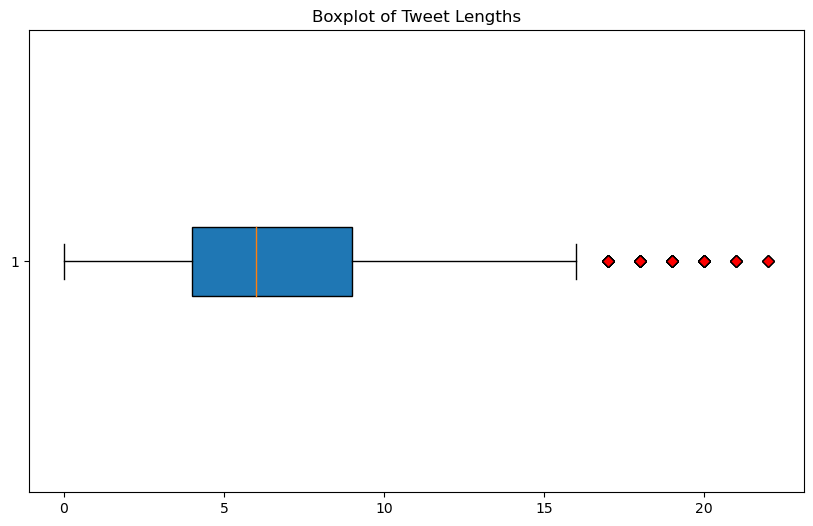

In [20]:
# Calculate the length of each tweet and add it as a new column
df_cleaned['tweet_length'] = df_cleaned['preprocessed_text'].apply(lambda x: len(x.split()))

# Create boxplot
plt.figure(figsize=(10,6))
plt.boxplot(df_cleaned['tweet_length'], vert=False,
            flierprops=dict(markerfacecolor='r', marker='D'), patch_artist=True)
plt.title('Boxplot of Tweet Lengths')
plt.show()

## Model Building - <font color="red">Multinomial Naive Bayes</font>

First we need to convert the labels for the training and test sets into a format that the model can interpret.

In [62]:
# Convert sentiment labels to numeric values (-1, 0)
df_cleaned['sentiment'] = df_cleaned['sentiment'].map({0: 0, 2: 1})

### Train Test Split
Here we will create the train and test datasets.

In [63]:
# Split the dataset into training and test sets, as `X` and `y` for input features and target variable
X = df_cleaned['preprocessed_text']  # Input features (preprocessed tweets)
y = df_cleaned['sentiment']  # Target variable (sentiment labels)

<font color="red">The only change here that made a difference to the test set was to reduce its size down to 20%.</font>

In [64]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13090,), (3273,), (13090,), (3273,))

In [66]:
print(y_train.value_counts())

sentiment
1    6838
0    6252
Name: count, dtype: int64


### Feature Extraction

#### Vectorization
<font color="red">**Here we will use the TF-IDF vectorizer.**</font>

In [67]:
# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

#### Modelling

In [68]:
# Train a Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectors, y_train)

MultinomialNB()

In [69]:
# Evaluate the model on the validation set
y_train_pred = naive_bayes_model.predict(X_train_vectors)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("-" * 54)
print("Train Accuracy:", accuracy_train)
print("-" * 54)
print(classification_report(y_train, y_train_pred))
print("-" * 54)


Training Set Metrics:
------------------------------------------------------
Train Accuracy: 0.9405653170359053
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6252
           1       0.93      0.96      0.94      6838

    accuracy                           0.94     13090
   macro avg       0.94      0.94      0.94     13090
weighted avg       0.94      0.94      0.94     13090

------------------------------------------------------


In [70]:
# Evaluate the model on the test set
y_test_pred = naive_bayes_model.predict(X_test_vectors)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("-" * 54)
print("Test Accuracy:", accuracy_test)
print("-" * 54)
print(classification_report(y_test, y_test_pred))
print("-" * 54)


Test Set Metrics:
------------------------------------------------------
Test Accuracy: 0.8576229758631225
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1529
           1       0.86      0.88      0.87      1744

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273

------------------------------------------------------


In [89]:
import joblib
# Save the model to a file
joblib.dump(naive_bayes_model, 'models/naive_bayes_model.pkl')

['models/naive_bayes_model.pkl']

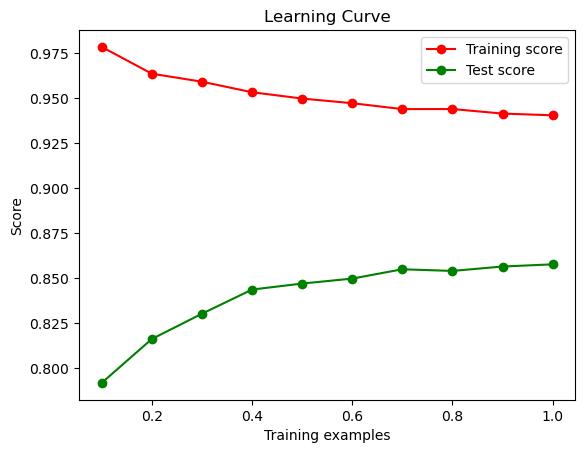

In [72]:
# Learning Curve Plot
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []
for train_size in train_sizes:
    subset_size = int(train_size * X_train_vectors.shape[0])
    X_subset = X_train_vectors[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_model.fit(X_subset, y_subset)
    train_scores.append(naive_bayes_model.score(X_subset, y_subset))
    test_scores.append(naive_bayes_model.score(X_test_vectors, y_test))

plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Test score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### Conclusion
The `MultinomialNB` model performed well on the train set with an accuracy of **94%**,  
and matched the accuracy of the baseline model of **85%** on the test set.

In [73]:
# Automated Conclusion
print(
    f"The `MultinomialNB` model performed well on the train set with an accuracy of {int(accuracy_train * 100)}%, "
    f"\nand matched the accuracy of the baseline model of {int(accuracy_test * 100)}% on the test set.")

The `MultinomialNB` model performed well on the train set with an accuracy of 94%, 
and matched the accuracy of the baseline model of 85% on the test set.


Leaving the **# tag** text in place does increase the model performance slightly from **0.8551787351054079** to **0.8576229758631225**.

In [74]:
print(f"An improvement of {round(0.8576229758631225 - 0.8551787351054079, 4)} or {round((0.8576229758631225 - 0.8551787351054079) * 100, 2)}%.")

An improvement of 0.0024 or 0.24%.


Lets take a look at the different outputs of the Stemmizer and Lemmatizer.

In [75]:
# Sample some text
sample_text = df.text[1020]
sample_text = sample_text.lower()
print(sample_text)

 i think we have it pretty much figured out.  added a box in the helsinki group where you can see the tweets


In [76]:
# Remove stopwords
sample = remove_stopwords(sample_text)

In [77]:
# Tokenize
sample = word_tokenize(sample)
print(sample)

['think', 'pretty', 'figured', 'out', '.', 'added', 'box', 'helsinki', 'group', 'tweets']


In [78]:
# Apply lemmatization using English Stemmer
elemma = EnglishStemmer()
etext = ' '.join([elemma.stem(word) for word in sample])
print(etext)

think pretti figur out . ad box helsinki group tweet


In [79]:
# Apply lemmatization using WordNet Lemmatizer
wlemma = WordNetLemmatizer()
wtext = ' '.join([wlemma.lemmatize(word) for word in sample])
print(wtext)

think pretty figured out . added box helsinki group tweet


In [80]:
# Sample some text
sample_text_1 = df.text[1]
sample_text_1 = sample_text_1.lower()
print(sample_text_1)

 sooo sad i will miss you here in san diego!!!


In [81]:
# Remove stopwords
sample_text_1 = remove_stopwords(sample_text_1)

In [82]:
# Tokenize
sample_text_1 = word_tokenize(sample_text_1)
print(sample_text_1)

['sooo', 'sad', 'miss', 'san', 'diego', '!', '!', '!']


Although the process is improved the following looses context, the tweeter misses their friend, not the place.  
This will not effect this use case as we are only interested in positive and negative sentiment, but is worth noting.

In [83]:
# Apply lemmatization using WordNet Lemmatizer
wlemma = WordNetLemmatizer()
wtext = ' '.join([wlemma.lemmatize(word) for word in sample_text_1])
print(wtext)

sooo sad miss san diego ! ! !
